### Source of the data: https://machinehack.com/hackathons/predict_the_data_scientists_salary_in_india_hackathon/overview

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

%matplotlib inline

C:\Users\Princy\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Princy\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.noijjg62emaszi6nyurl6jbkm4evbgm7.gfortran-win_amd64.dll
C:\Users\Princy\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data=pd.read_csv("Final_Train_Dataset.csv")
data.head(3)

,Unnamed: 0,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687
1,1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458
2,2,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195


In [3]:
test_data=pd.read_csv(r"C:\Users\Princy\Downloads\MH_DS_salary\Final_Test_Dataset.csv")
test_data.head(5)

,experience,job_description,job_desig,job_type,key_skills,location,company_name_encoded
0,7-12 yrs,Professional experience in Java/J2EE based ser...,IT Technology Senior Consultant/java/ J2ee/ Se...,NaN,"Java, J2Ee, Tomcat, JBoss, Weblogic, Oracle, E...",Bengaluru,2066
1,0-5 yrs,We are looking for 20+ Fresher/Experienced Can...,Medical Billing Process | International KPO | ...,NaN,"Medical Billing, Insurance Processing",Ahmedabad(Sola),2629
2,3-6 yrs,Should understand overall integration framewor...,Oracle Sales Cloud Functional Consultant,NaN,"Oracle Sales, Functional Consultancy, Troubles...",Bengaluru,2448
3,0-3 yrs,NaN,Looking For Freshers WHO WANT To Work WITH US,NaN,"offline, online, internet, part time, home bas...","Delhi NCR, Chennai, Hyderabad, Gurgaon, Luckno...",2711
4,0-5 yrs,NaN,Process Associate / Sr Process Associate / Tec...,NaN,"voice support, analytical skills, Process asso...",Hyderabad,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19802 entries, 0 to 19801
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            19802 non-null  int64 
 1   experience            19802 non-null  object
 2   job_description       15384 non-null  object
 3   job_desig             19802 non-null  object
 4   job_type              4797 non-null   object
 5   key_skills            19801 non-null  object
 6   location              19802 non-null  object
 7   salary                19802 non-null  object
 8   company_name_encoded  19802 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 1.4+ MB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   experience            6601 non-null   object
 1   job_description       5079 non-null   object
 2   job_desig             6601 non-null   object
 3   job_type              1637 non-null   object
 4   key_skills            6601 non-null   object
 5   location              6601 non-null   object
 6   company_name_encoded  6601 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 361.1+ KB


In [6]:
data.nunique()

Unnamed: 0              19802
experience                129
job_description          9059
job_desig               11708
job_type                    5
key_skills              12951
location                 1504
salary                      6
company_name_encoded     5035
dtype: int64

In [7]:
test_data.nunique()

experience               110
job_description         4064
job_desig               5135
job_type                   5
key_skills              5589
location                 803
company_name_encoded    2752
dtype: int64

In [8]:
data['experience'].value_counts()

5-10 yrs     1274
2-5 yrs      1188
3-8 yrs       922
2-7 yrs       832
4-9 yrs       678
             ... 
17-24 yrs       1
19-23 yrs       1
4-4 yrs         1
14-19 yrs       1
23-30 yrs       1
Name: experience, Length: 129, dtype: int64

In [10]:
data['salary'].unique()

array(['6to10', '10to15', '15to25', '3to6', '25to50', '0to3'],
      dtype=object)

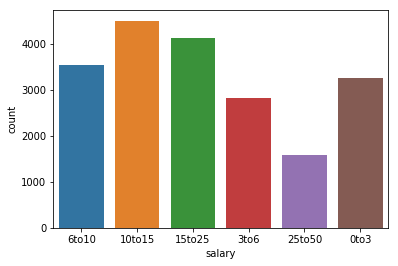

In [11]:
sns.countplot(x=data['salary'])
plt.show()

## Data Cleaning

In [12]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [13]:
data.head(5)

,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687
1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458
2,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195
3,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313
4,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,1305


In [14]:
def min_exp(exp):
    exp=re.sub('-',' ',exp)
    exp=exp.split()
    return exp[0]

def max_exp(exp):
    exp=re.sub('-',' ',exp)
    exp=exp.split()
    return exp[1]

data['min_experience']=data['experience'].apply(min_exp)
test_data['min_experience']=test_data['experience'].apply(min_exp)

data['max_experience']=data['experience'].apply(max_exp)
test_data['max_experience']=test_data['experience'].apply(max_exp)

- No null values present in 'experience', 'job_desig', 'location', 'salary','company_name_encoded' columns.

In [15]:
print(data['job_description'].isna().sum())
data['job_description'].fillna('data_not_available', inplace=True)
print(data['job_description'].isna().sum())

4418
0


In [16]:
def fill_na(col_name, str_name):
    null1=col_name.isna().sum().sum()
    col_name.fillna(str_name, inplace=True)
    null2=col_name.isna().sum().sum()
    print("Number of null values in before preprocessing:", null1)
    print("Number of null values in after preprocessing:", null2)

In [17]:
#key_skills_train
fill_na(data['key_skills'], "data_not_available")

Number of null values in before preprocessing: 1
Number of null values in after preprocessing: 0


In [18]:
#key_skills_test
fill_na(test_data['key_skills'], "data_not_available")

Number of null values in before preprocessing: 0
Number of null values in after preprocessing: 0


In [19]:
#job_type_train
fill_na(data['job_type'], "data_not_available")

Number of null values in before preprocessing: 15005
Number of null values in after preprocessing: 0


In [20]:
#job_type_test
fill_na(test_data['job_type'], "data_not_available")

Number of null values in before preprocessing: 4964
Number of null values in after preprocessing: 0


In [21]:
(data['job_type']).value_counts()

data_not_available    15005
Analytics              3747
analytics               921
ANALYTICS                77
analytic                 32
Analytic                 20
Name: job_type, dtype: int64

In [22]:
def clean_job(desc):
    desc=str(desc).lower()
    desc=re.sub('[^a-z]',' ', desc)
    desc=re.sub(r'\s+', ' ',desc)
    return desc
    
data['clean_job_descripton']=data['job_description'].apply(clean_job)
test_data['clean_job_descripton']=test_data['job_description'].apply(clean_job)

In [23]:
data['clean_job_desig']=data['job_desig'].apply(clean_job)
test_data['clean_job_desig']=test_data['job_desig'].apply(clean_job)

In [24]:
data['job_type'].replace('Analytics', 'analytics', inplace=True)
data['job_type'].replace('Analytic', 'analytics', inplace=True)
data['job_type'].replace('ANALYTICS', 'analytics', inplace=True)
data['job_type'].replace('analytic', 'analytics', inplace=True)


test_data.fillna('missing', inplace=True)
test_data['job_type'].replace('Analytics', 'analytics', inplace=True)
test_data['job_type'].replace('Analytic', 'analytics', inplace=True)
test_data['job_type'].replace('ANALYTICS', 'analytics', inplace=True)
test_data['job_type'].replace('analytic', 'analytics', inplace=True)

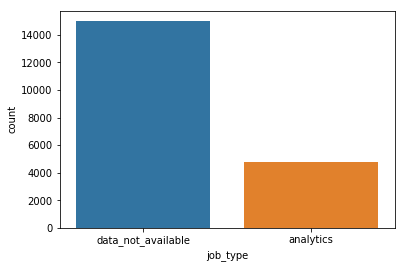

In [25]:
sns.countplot(x=data['job_type'])
plt.show()

In [26]:
d1=data['key_skills'][1]
d2= re.sub(r'\...','', d1)
d2 = re.sub(r',\s','+', d2)
d2 = re.sub(r'\s', '_', d2)
d2=re.sub(r'\+',' ',d2)
d1,d2

('ppc, logistics, inventory management, supply chain management, procurement,...',
 'ppc logistics inventory_management supply_chain_management procurement,')

In [27]:
def clean_key_skills(skl):
    skl=str(skl).lower()
    skl=re.sub('\...','',skl)
    skl=re.sub(r',\s','+', skl)
    skl = re.sub(r'\s', '_', skl)
    skl=re.sub(r'\+',' ',skl)
    return skl

data['clean_skills']=data['key_skills'].apply(clean_key_skills)
test_data['clean_skills']=test_data['key_skills'].apply(clean_key_skills)

In [28]:
def clean_location(loc):
    loc=str(loc).lower()
    loc=re.sub('[^a-z]',' ', loc)
    return loc
data['cleaned_loc']=data['location'].apply(clean_location)
test_data['cleaned_loc']=test_data['location'].apply(clean_location)

In [29]:
data.head(4)

,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded,min_experience,max_experience,clean_job_descripton,clean_job_desig,clean_skills,cleaned_loc
0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,data_not_available,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687,5,7,exp minimum years good understanding of ioc ru...,senior exploit and vulnerability researcher,team_skills communication_skills analytical_sk...,delhi ncr vikas puri
1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,data_not_available,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458,10,17,he should have handled a team of atleast direc...,head scm,ppc logistics inventory_management supply_chai...,sonepat
2,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195,5,9,must be an effective communicator written spok...,deputy manager talent management leadership de...,hr_analytics employee_engagement training succ...,delhi ncr
3,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313,7,10,years of overall experience in data engineeri...,associate manager data engineering,sql javascript automation python ruby analytic...,bengaluru


In [30]:
data['max_experience'].unique()

array(['7', '17', '9', '10', '3', '15', '6', '12', '4', '8', '5', '20',
       '11', '16', '14', '2', '13', '25', '1', '0', '30', '23', '18',
       '22', '24', '19', '28', '21', '26'], dtype=object)

In [42]:
data['max_experience']=data['max_experience'].astype(int)
data['min_experience']=data['max_experience'].astype(int)

In [43]:
data['max_experience'].unique()

array([ 7, 17,  9, 10,  3, 15,  6, 12,  4,  8,  5, 20, 11, 16, 14,  2, 13,
       25,  1,  0, 30, 23, 18, 22, 24, 19, 28, 21, 26])

C:\Users\Princy\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


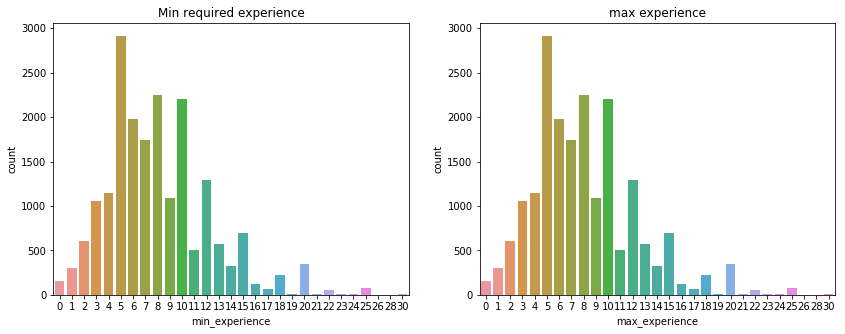

In [44]:
#min, max exp

fig, ax =plt.subplots(1,2, figsize=(14,5))
sns.countplot(data=data, x="min_experience", ax=ax[0])
sns.countplot(data=data, x="max_experience", ax=ax[1])
ax[0].set_title("Min required experience")
ax[1].set_title("max experience")
fig.show()

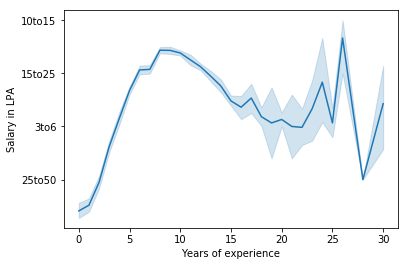

In [53]:
#plt.figure(figsize=(14,8))
sns.lineplot(x='min_experience', y='salary', data=data,)
plt.xlabel('Years of experience')
plt.ylabel('Salary in LPA')
plt.show()

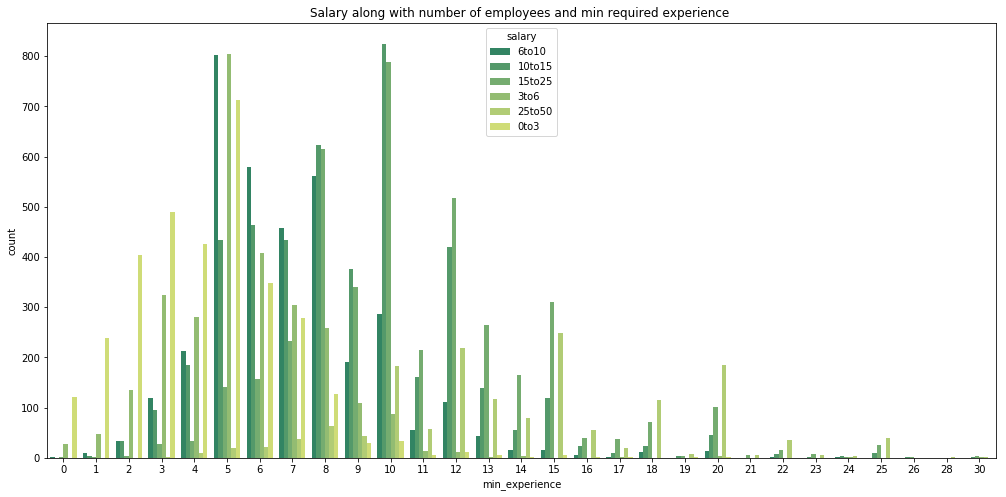

In [54]:
plt.figure(figsize=(17,8))
sns.countplot(x=data['min_experience'], hue=data['salary'], palette='summer')
plt.title("Salary along with number of employees and min required experience ")
plt.show()

- The CTC range 25-60 has been mostly filled by people with 8 years of experinece, followed by 10 years.
- Freshers with 0 or 1 year experience topped 0-3 CTC bracket.
- Whereas 2 years of experienced people soared high in 6-10 CTC bracket, followed by 5 years, 3 years.
- The 10-15 salary range has been mostly filled by employees having 5,3,4,2,8 years of experience.

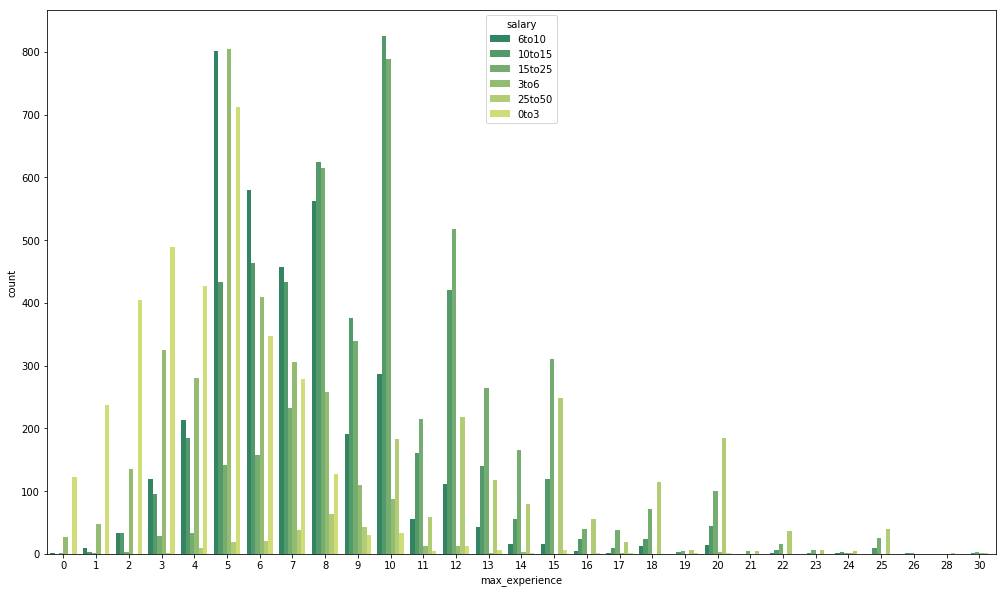

In [55]:
plt.figure(figsize=(17,10))
sns.countplot(x=data['max_experience'], hue=data['salary'], palette='summer')
plt.show()

In [88]:
data['cleaned_loc'].value_counts(ascending=False)[:8]

bengaluru    4168
mumbai       2508
gurgaon      1644
pune         1193
hyderabad    1083
chennai       978
delhi ncr     734
noida         514
Name: cleaned_loc, dtype: int64

- We can see that the most happening cities are Bangalore, Mumbai, Gurgaon followed by Pune, Hyderabad etc.

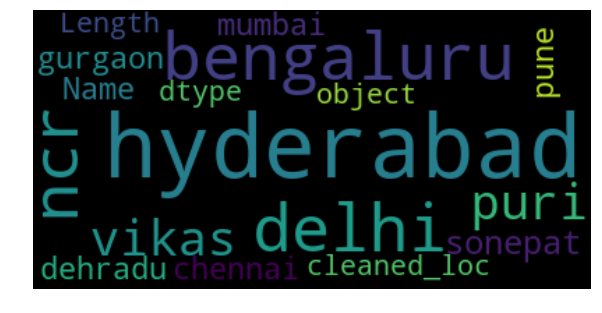

In [84]:
# Create and generate a word cloud image for key skills
text=str(data['cleaned_loc'])
wordcloud = WordCloud(max_words=200).generate(text)

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

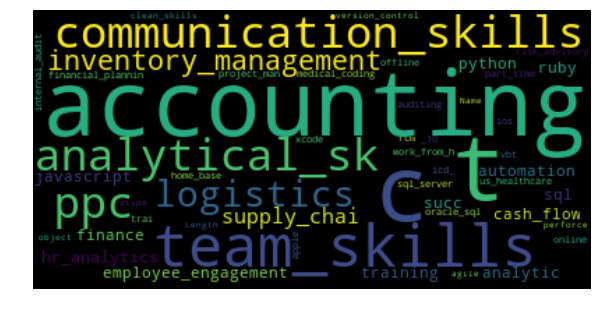

In [91]:
# Create and generate a word cloud image for key skills
text=str(data['clean_skills'])
wordcloud = WordCloud(max_words=200).generate(text)

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [109]:
X=data[['min_experience','max_experience','clean_job_descripton','clean_job_desig','clean_skills','cleaned_loc', 'company_name_encoded']]
y=data['salary'].values

In [110]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_cv,y_train,y_cv=train_test_split(X,y, test_size=0.25, stratify=y,random_state=0)
X_test=test_data[['min_experience','max_experience','clean_job_descripton','clean_job_desig','clean_skills','cleaned_loc', 'company_name_encoded']]
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape, X_test.shape

((14851, 7), (14851,), (4951, 7), (4951,), (6601, 7))

## Encoding

In [66]:
X_test.nunique()

min_experience            20
max_experience            28
clean_job_descripton    4020
clean_job_desig         5039
clean_skills            5549
cleaned_loc              777
company_name_encoded    2752
dtype: int64

### Encoding numerical features

In [111]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['min_experience'].values.reshape(1,-1))

X_train_min_experience = normalizer.transform(X_train['min_experience'].values.reshape(-1,1))
X_cv_min_experience = normalizer.transform(X_cv['min_experience'].values.reshape(-1,1))
X_test_min_experience = normalizer.transform(X_test['min_experience'].values.reshape(-1,1))


print("After vectorizations")
print(X_train_min_experience.shape, y_train.shape)
print(X_cv_min_experience.shape, y_cv.shape)
print(X_test_min_experience.shape)
print("="*100)

After vectorizations
(14851, 1) (14851,)
(4951, 1) (4951,)
(6601, 1)


In [112]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['max_experience'].values.reshape(1,-1))

X_train_max_experience = normalizer.transform(X_train['max_experience'].values.reshape(-1,1))
X_cv_max_experience = normalizer.transform(X_cv['max_experience'].values.reshape(-1,1))
X_test_max_experience = normalizer.transform(X_test['max_experience'].values.reshape(-1,1))


print("After vectorizations")
print(X_train_max_experience.shape, y_train.shape)
print(X_cv_max_experience.shape, y_cv.shape)
print(X_test_max_experience.shape)
print("="*100)

After vectorizations
(14851, 1) (14851,)
(4951, 1) (4951,)
(6601, 1)


### Encoding categorical features

In [114]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(y_train)

y_train =le.transform(y_train)
y_cv = le.transform(y_cv)


print("After vectorizations")
print(y_train.shape)
print(y_cv.shape)
print("="*100)

After vectorizations
(14851,)
(4951,)


In [116]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(X['company_name_encoded'])

X_train_company_name_encoded =le.transform(X_train['company_name_encoded'].values).reshape(-1,1)
X_cv_company_name_encoded = le.transform(X_cv['company_name_encoded'].values).reshape(-1,1)
X_test_company_name_encoded = le.transform(X_test['company_name_encoded'].values).reshape(-1,1)


print("After vectorizations")
print(X_train_company_name_encoded.shape, y_train.shape)
print(X_cv_company_name_encoded.shape, y_cv.shape)
print(X_test_company_name_encoded.shape)
print("="*100)

After vectorizations
(14851, 1) (14851,)
(4951, 1) (4951,)
(6601, 1)


In [119]:
#BOW on clean_job_descripton

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

vectorizer.fit(X_train['cleaned_loc'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_cleaned_loc = vectorizer.transform(X_train['cleaned_loc'].values)
X_cv_cleaned_loc = vectorizer.transform(X_cv['cleaned_loc'].values)
X_test_cleaned_loc = vectorizer.transform(X_test['cleaned_loc'].values)

print("After vectorizations")
print(X_train_cleaned_loc.shape, y_train.shape)
print(X_cv_cleaned_loc.shape, y_cv.shape)
print(X_test_cleaned_loc.shape)
print("="*100)

#vectorizer.get_feature_names()

After vectorizations
(14851, 869) (14851,)
(4951, 869) (4951,)
(6601, 869)


## Encoding Text Features

In [120]:
#BOW on clean_job_descripton
vectorizer = CountVectorizer()

vectorizer.fit(X_train['clean_job_descripton'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_job_descripton = vectorizer.transform(X_train['clean_job_descripton'].values)
X_cv_clean_job_descripton = vectorizer.transform(X_cv['clean_job_descripton'].values)
X_test_clean_job_descripton = vectorizer.transform(X_test['clean_job_descripton'].values)

print("After vectorizations")
print(X_train_clean_job_descripton.shape, y_train.shape)
print(X_cv_clean_job_descripton.shape, y_cv.shape)
print(X_test_clean_job_descripton.shape)
print("="*100)

#vectorizer.get_feature_names()

After vectorizations
(14851, 6068) (14851,)
(4951, 6068) (4951,)
(6601, 6068)


In [121]:
#BOW on clean_job_desig
vectorizer = CountVectorizer()

vectorizer.fit(X_train['clean_job_desig'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_job_desig = vectorizer.transform(X_train['clean_job_desig'].values)
X_cv_clean_job_desig = vectorizer.transform(X_cv['clean_job_desig'].values)
X_test_clean_job_desig = vectorizer.transform(X_test['clean_job_desig'].values)

print("After vectorizations")
print(X_train_clean_job_desig.shape, y_train.shape)
print(X_cv_clean_job_desig.shape, y_cv.shape)
print(X_test_clean_job_desig.shape)
print("="*100)

After vectorizations
(14851, 4010) (14851,)
(4951, 4010) (4951,)
(6601, 4010)


In [76]:
#BOW on clean_skills
vectorizer = CountVectorizer()

vectorizer.fit(X_train['clean_skills'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_skills = vectorizer.transform(X_train['clean_skills'].values)
X_cv_clean_skills = vectorizer.transform(X_cv['clean_skills'].values)
X_test_clean_skills = vectorizer.transform(X_test['clean_skills'].values)

print("After vectorizations")
print(X_train_clean_skills.shape, y_train.shape)
print(X_cv_clean_skills.shape, y_cv.shape)
print(X_test_clean_skills.shape)
print("="*100)

After vectorizations
(14851, 8361) (14851,)
(4951, 8361) (4951,)
(6601, 8361)


In [122]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr_final = hstack((X_train_min_experience, X_train_max_experience, X_train_clean_job_descripton,X_train_clean_job_desig,X_train_clean_skills, X_train_cleaned_loc,X_train_company_name_encoded))
X_cv_final = hstack((X_cv_min_experience, X_cv_max_experience, X_cv_clean_job_descripton,X_cv_clean_job_desig, X_cv_clean_skills,X_cv_cleaned_loc,X_cv_company_name_encoded)).tocsr()
X_te_final = hstack(( X_test_min_experience, X_test_max_experience, X_test_clean_job_descripton, X_test_clean_job_desig,X_test_clean_skills, X_test_cleaned_loc,X_test_company_name_encoded)).tocsr()

print(X_tr_final.shape, y_train.shape)
print(X_cv_final.shape, y_cv.shape)
print(X_te_final.shape)
print("="*100)

(14851, 19311) (14851,)
(4951, 19311) (4951,)
(6601, 19311)


## LightGBM Regression

In [141]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

clf_rf = LGBMRegressor()
clf_rf.fit(X_tr_final,y_train)
y_train_pred=clf_rf.predict(X_tr_final)
y_cv_pred=clf_rf.predict(X_cv_final)

print('MSE train=', mean_squared_error(y_train, y_train_pred))
print('MSE cv=', mean_squared_error(y_cv, y_cv_pred))
print('\n')
print('RMSE_train=',np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE_cv=',np.sqrt(mean_squared_error(y_cv, y_cv_pred)))

MSE train= 2.145190637300736
MSE cv= 2.5871552542112877


RMSE_train= 1.464646932643064
RMSE_cv= 1.6084636316097694


C:\Users\Princy\Anaconda3\lib\site-packages\lightgbm\basic.py:739: UserWarning: Converting data to scipy sparse matrix.
  _log_warning('Converting data to scipy sparse matrix.')


- Since the difference between the train_mse and cv_mse is very less we can say that the model is neither overfitted nor underfitted. After taking the square of mse we can easily find the root mean square error.

In [145]:
#Predict the final test output
y_te_pred=clf_rf.predict(X_te_final)
y_te_pred1=le.inverse_transform(y_te_pred)

In [151]:
#sample submission file 
submission=pd.read_excel(r"C:\Users\Princy\Downloads\MH_DS_salary\sample_submission.xlsx")

In [152]:
#Replace the sample salaries with the model predicted salaries
submission['salary']=y_te_pred1

In [153]:
#save the file 
submission.to_csv(r'C:\Users\Princy\Downloads\Job-a-thon 2021\LightGBM_final.csv', index=False)